In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv('housepricedata.csv')
df

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


In [3]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

([<matplotlib.patches.Wedge at 0x2024d4b25d0>,
 [Text(-0.00473379167683139, 1.099989814142095, '0'),
  Text(0.004733688688351944, -1.0999898145852998, '1')],
 [Text(-0.0025820681873625763, 0.5999944440775062, '50.1%'),
  Text(0.0025820120118283324, -0.5999944443192543, '49.9%')])

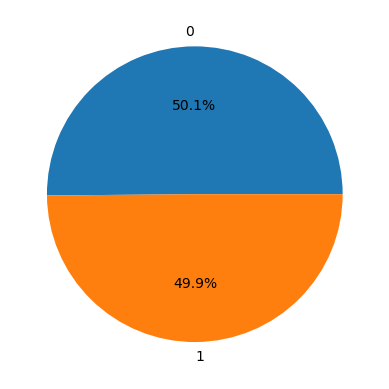

In [4]:
counts = y.value_counts()
plt.pie(counts.values,labels=counts.index,autopct='%1.1f%%')

In [5]:
from sklearn.preprocessing import MinMaxScaler 
sc = MinMaxScaler() 
X_scale = sc.fit_transform(X)

In [6]:
X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [24]:
from sklearn.model_selection import train_test_split 
x_train,x_test_val,y_train,y_test_val = train_test_split(X_scale,y.values,test_size=.3,random_state=0)
x_test,x_val,y_test,y_val =train_test_split(x_test_val,y_test_val,test_size=.5,random_state=0)

x_train.shape ,x_val.shape, x_test.shape

((1022, 10), (219, 10), (219, 10))

In [25]:
from keras.models import Sequential 
from keras.layers import Dense 
from keras.losses import BinaryCrossentropy
model =  Sequential() 
model.add( Dense(input_shape=(x_train.shape[1],),units=48,activation='relu'))
model.add( Dense(units=32,activation='relu'))
model.add( Dense(units=1,activation='sigmoid'))

model.compile(optimizer='adam',loss=BinaryCrossentropy(),metrics=['accuracy'])

history = model.fit(x_train,y_train,epochs=100,validation_data=(x_val,y_val))

Epoch 1/100


C:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5078 - loss: 0.6761 - val_accuracy: 0.6301 - val_loss: 0.6461
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6774 - loss: 0.6364 - val_accuracy: 0.8174 - val_loss: 0.5863
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8068 - loss: 0.5750 - val_accuracy: 0.8493 - val_loss: 0.5014
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8014 - loss: 0.4932 - val_accuracy: 0.8721 - val_loss: 0.4274
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8526 - loss: 0.4190 - val_accuracy: 0.8630 - val_loss: 0.3849
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8462 - loss: 0.3896 - val_accuracy: 0.8447 - val_loss: 0.3738
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8620 - loss: 0.3478 - val_accuracy: 0.8950 - val_loss: 0.3388
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8673 - loss: 0.3399 - val_accuracy: 0.8950 - val_loss: 0.3

In [28]:
model.evaluate(x_test,y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9209 - loss: 0.2498 


[0.20386585593223572, 0.9178082346916199]

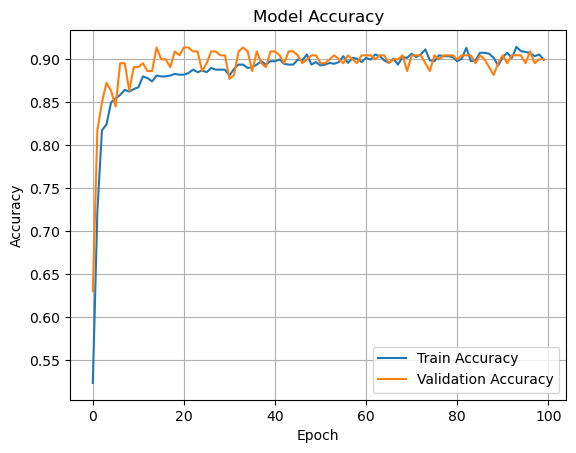

In [26]:
# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Model Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

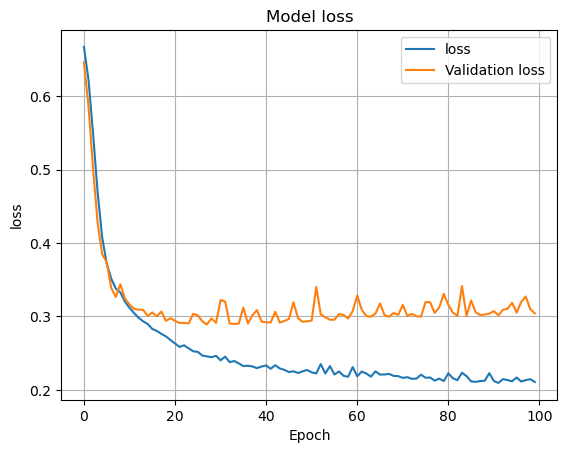

In [27]:
# Plot accuracy
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title("Model loss")
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend()
plt.grid(True)
plt.show()

In [42]:
model2 =  Sequential() 
model2.add( Dense(input_shape=(x_train.shape[1],),units=1000,activation='relu'))
model2.add( Dense(units=1000,activation='relu'))
model2.add( Dense(units=1000,activation='relu'))
model2.add( Dense(units=1000,activation='relu'))
model2.add( Dense(units=1,activation='sigmoid'))

model2.compile(optimizer='adam',loss=BinaryCrossentropy(),metrics=['accuracy'])

history2 = model2.fit(x_train,y_train,epochs=100,batch_size=32,validation_data=(x_val,y_val))

Epoch 1/100


C:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.6883 - loss: 0.5545 - val_accuracy: 0.8904 - val_loss: 0.3118
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.8388 - loss: 0.3702 - val_accuracy: 0.8904 - val_loss: 0.3064
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.8760 - loss: 0.2866 - val_accuracy: 0.8995 - val_loss: 0.2942
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.8609 - loss: 0.2786 - val_accuracy: 0.8995 - val_loss: 0.3285
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.8897 - loss: 0.2654 - val_accuracy: 0.8813 - val_loss: 0.3211
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.8846 - loss: 0.2644 - val_accuracy: 0.9087 - val_loss: 0.3099
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9093 - loss: 0.2320 - val_accuracy: 0.9041 - val_loss: 0.3230
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.8887 - loss: 0.2406 - val_accuracy: 0.8995 - val_l

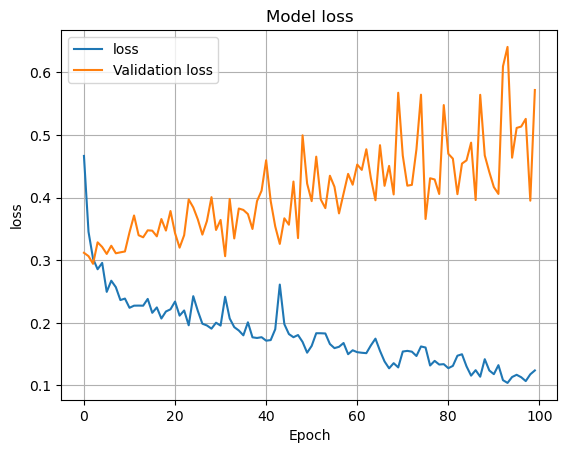

In [43]:
# Plot accuracy
plt.plot(history2.history['loss'], label='loss')
plt.plot(history2.history['val_loss'], label='Validation loss')
plt.title("Model loss")
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend()
plt.grid(True)
plt.show()

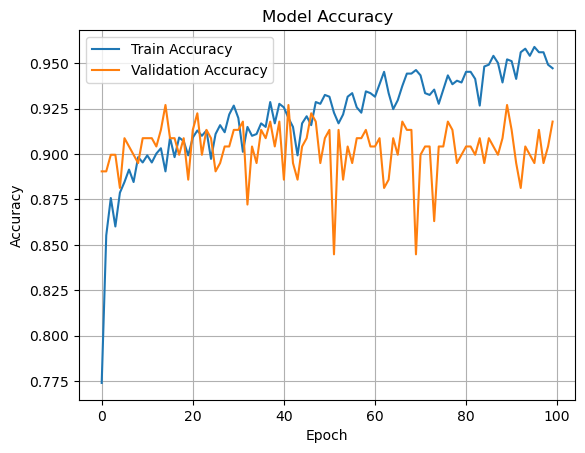

In [44]:
# Plot accuracy
plt.plot(history2.history['accuracy'], label='Train Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.title("Model Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [36]:
from keras.layers import Dropout 
from keras import regularizers 
model3 =  Sequential() 
model3.add( Dense(input_shape=(x_train.shape[1],),units=1000,activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model3.add(Dropout(0.3))
model3.add( Dense(units=1000,activation='relu' ,kernel_regularizer=regularizers.l2(0.01) ))
model3.add(Dropout(0.3))
model3.add( Dense(units=1000,activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model3.add(Dropout(0.3))
model3.add( Dense(units=1000,activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model3.add(Dropout(0.3))
model3.add( Dense(units=1,activation='sigmoid',kernel_regularizer=regularizers.l2(0.01)))

model3.compile(optimizer='adam',loss=BinaryCrossentropy(),metrics=['accuracy'])

history3 = model3.fit(x_train,y_train,epochs=100,batch_size=32,validation_data=(x_val,y_val))

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.5415 - loss: 21.1641 - val_accuracy: 0.7717 - val_loss: 3.9159
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.7951 - loss: 2.5138 - val_accuracy: 0.8219 - val_loss: 0.7173
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.8238 - loss: 0.6743 - val_accuracy: 0.9178 - val_loss: 0.5037
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.8467 - loss: 0.5318 - val_accuracy: 0.8950 - val_loss: 0.5036
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.8708 - loss: 0.4906 - val_accuracy: 0.9087 - val_loss: 0.4649
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.8614 - loss: 0.4848 - val_accuracy: 0.9041 - val_loss: 0.4649
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.8713 - loss: 0.4613 - val_accuracy: 0.8402 - val_loss: 0.5074
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.8820 - loss: 0.4550 - val_accuracy: 0

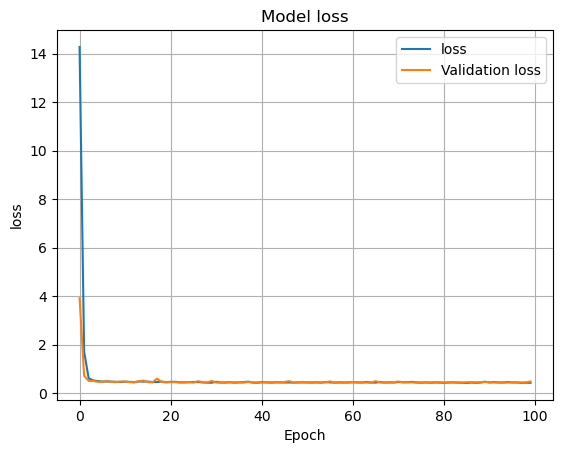

In [37]:
# Plot accuracy
plt.plot(history3.history['loss'], label='loss')
plt.plot(history3.history['val_loss'], label='Validation loss')
plt.title("Model loss")
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend()
plt.grid(True)
plt.show()

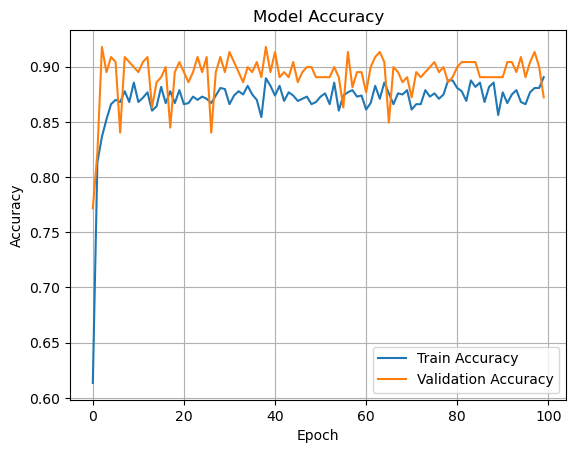

In [38]:
# Plot accuracy
plt.plot(history3.history['accuracy'], label='Train Accuracy')
plt.plot(history3.history['val_accuracy'], label='Validation Accuracy')
plt.title("Model Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [45]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report

# Make predictions
y_pred = model3.predict(x_test)
y_pred = [1 if y > 0.5 else 0 for y in y_pred]

# Evaluate metrics — correct order: y_true, y_pred
print("Accuracy   :", accuracy_score(y_test, y_pred))
print("Precision  :", precision_score(y_test, y_pred))
print("Recall     :", recall_score(y_test, y_pred))
print("F1 Score   :", f1_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))



7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Accuracy   : 0.9178082191780822
Precision  : 0.9607843137254902
Recall     : 0.875
F1 Score   : 0.9158878504672897

Classification Report:

              precision    recall  f1-score   support

           0       0.88      0.96      0.92       107
           1       0.96      0.88      0.92       112

    accuracy                           0.92       219
   macro avg       0.92      0.92      0.92       219
weighted avg       0.92      0.92      0.92       219



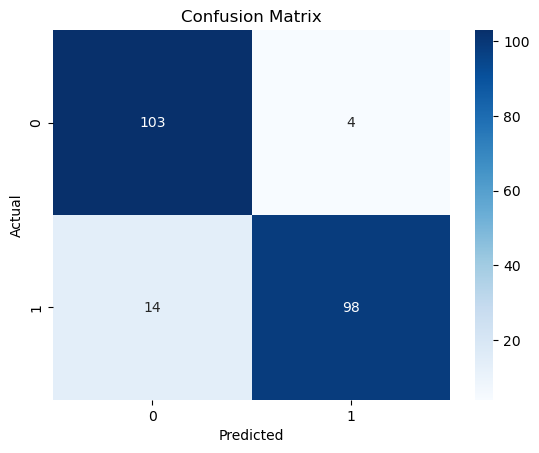

In [46]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [47]:
model3.save('house_model.keras')

In [48]:
from joblib import dump 
dump(sc,'min_max_scaler.pkl')

['min_max_scaler.pkl']

In [49]:
import numpy as np

new_house = np.array( [[100,6,6,800, 2, 2, 3, 7, 1, 500]])

In [50]:
from joblib import load 
sc_loaded = load('min_max_scaler.pkl')
new_house_scale = sc_loaded.transform(new_house)


C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [51]:
pred = model3.predict(new_house_scale)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


In [52]:
pred

array([[0.86137927]], dtype=float32)

In [55]:
from keras.models import load_model

loaded_model = load_model("house_model.keras")
new_prediction_proba = loaded_model.predict(new_house_scale )

new_prediction = (new_prediction_proba > 0.5)

print(new_prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
[[ True]]
